In [29]:
import numpy as np
import matplotlib.pyplot as plt
from bokeh.models import (ColorBar,
                          FixedTicker, 
                          LinearColorMapper, 
                          PrintfTickFormatter,
                          ColumnDataSource)
from bokeh.plotting import gridplot, figure, show, output_file
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

## 01_Variable_Scalar
Create a permutation for a range of scalar to add to a variable

In [13]:
x = np.linspace(0.5, 1.5, 3)
x

array([0.5, 1. , 1.5])

In [16]:
np.meshgrid(x, x)

[array([[0.5, 1. , 1.5],
        [0.5, 1. , 1.5],
        [0.5, 1. , 1.5]]), array([[0.5, 0.5, 0.5],
        [1. , 1. , 1. ],
        [1.5, 1.5, 1.5]])]

In [18]:
np.array(np.meshgrid(x, x)).T

array([[[0.5, 0.5],
        [0.5, 1. ],
        [0.5, 1.5]],

       [[1. , 0.5],
        [1. , 1. ],
        [1. , 1.5]],

       [[1.5, 0.5],
        [1.5, 1. ],
        [1.5, 1.5]]])

In [19]:
np.array(np.meshgrid(x, x)).T.reshape(-1,2)

array([[0.5, 0.5],
       [0.5, 1. ],
       [0.5, 1.5],
       [1. , 0.5],
       [1. , 1. ],
       [1. , 1.5],
       [1.5, 0.5],
       [1.5, 1. ],
       [1.5, 1.5]])

## generalize

In [21]:
x = np.linspace(0.5, 1.5, 5)
np.array(np.meshgrid(x, x)).T.reshape(-1,2)

array([[0.5 , 0.5 ],
       [0.5 , 0.75],
       [0.5 , 1.  ],
       [0.5 , 1.25],
       [0.5 , 1.5 ],
       [0.75, 0.5 ],
       [0.75, 0.75],
       [0.75, 1.  ],
       [0.75, 1.25],
       [0.75, 1.5 ],
       [1.  , 0.5 ],
       [1.  , 0.75],
       [1.  , 1.  ],
       [1.  , 1.25],
       [1.  , 1.5 ],
       [1.25, 0.5 ],
       [1.25, 0.75],
       [1.25, 1.  ],
       [1.25, 1.25],
       [1.25, 1.5 ],
       [1.5 , 0.5 ],
       [1.5 , 0.75],
       [1.5 , 1.  ],
       [1.5 , 1.25],
       [1.5 , 1.5 ]])

In [33]:
# turn array into a dataframe for plotting

x = np.linspace(0.5, 1.5, 3)
df = pd.DataFrame(np.array(np.meshgrid(x, x)).T.reshape(-1,2), columns=['x', 'y'])
df['z']=5*df['x'] + 3*df['y']
df

,x,y,z
0,0.5,0.5,4.0
1,0.5,1.0,5.5
2,0.5,1.5,7.0
3,1.0,0.5,6.5
4,1.0,1.0,8.0
5,1.0,1.5,9.5
6,1.5,0.5,9.0
7,1.5,1.0,10.5
8,1.5,1.5,12.0


## 02_Contour_Plot

In [45]:
x = np.linspace(0.5, 1.5, 5)
y = x
x

array([0.5 , 0.75, 1.  , 1.25, 1.5 ])

In [65]:
X, Y = np.meshgrid(x, y, sparse=True)
X

array([[0.5 , 0.75, 1.  , 1.25, 1.5 ]])

In [66]:
Y

array([[0.5 ],
       [0.75],
       [1.  ],
       [1.25],
       [1.5 ]])

In [69]:
# computation to generate Z matrix
Z = X+2*Y
Z

array([[1.5 , 1.75, 2.  , 2.25, 2.5 ],
       [2.  , 2.25, 2.5 , 2.75, 3.  ],
       [2.5 , 2.75, 3.  , 3.25, 3.5 ],
       [3.  , 3.25, 3.5 , 3.75, 4.  ],
       [3.5 , 3.75, 4.  , 4.25, 4.5 ]])

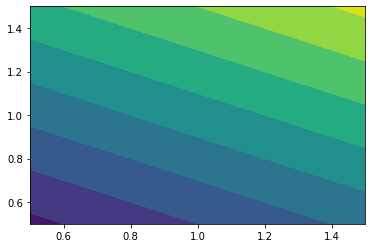

In [70]:
h = plt.contourf(x,y,Z)
plt.show()

In [43]:
np.meshgrid?

Signature: np.meshgrid(*xi, **kwargs)
Docstring:
Return coordinate matrices from coordinate vectors.

Make N-D coordinate arrays for vectorized evaluations of
N-D scalar/vector fields over N-D grids, given
one-dimensional coordinate arrays x1, x2,..., xn.

.. versionchanged:: 1.9
   1-D and 0-D cases are allowed.

Parameters
----------
x1, x2,..., xn : array_like
    1-D arrays representing the coordinates of a grid.
indexing : {'xy', 'ij'}, optional
    Cartesian ('xy', default) or matrix ('ij') indexing of output.
    See Notes for more details.

    .. versionadded:: 1.7.0
sparse : bool, optional
    If True a sparse grid is returned in order to conserve memory.
    Default is False.

    .. versionadded:: 1.7.0
copy : bool, optional
    If False, a view into the original arrays are returned in order to
    conserve memory.  Default is True.  Please note that
    ``sparse=False, copy=False`` will likely return non-contiguous
    arrays.  Furthermore, more than one element of a broad